<a href="https://colab.research.google.com/github/shivam8764/wheat_diseasedetection/blob/main/Wheat_Disease_Detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.vgg19 import VGG19
# from sklearn.model_selection import train_test_split
# from keras.layers.pooling import AveragePooling2D
# from keras.layers.core import Dropout
# from keras.layers.core import Flatten
# from keras.layers.core import Dense
# from sklearn.preprocessing import LabelBinarizer
# from keras.layers import Input
# from sklearn.metrics import classification_report
# from imutils import paths
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
# import os
# import pickle
# from keras.models import Model
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
# from keras.layers.pooling import AveragePooling2D
from tensorflow.keras.layers import Dropout
# from keras.layers.core import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import classification_report
from keras.applications import VGG19
from imutils import paths
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pickle

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Large Wheat classification detection"

'Crown and Root Rot'  'Healthy Wheat'  'Leaf Rust'  'Wheat Loose Smut'


In [ ]:
dataset = "/content/drive/MyDrive/Large Wheat classification detection"
label = "lb.pickle"
LABELS = set(["Crown and Root Rot", "Healthy Wheat", "Leaf Rust", "Wheat Loose Smut"])

In [ ]:
sample_path = list(paths.list_images('/content/drive/MyDrive/Large Wheat classification detection/Crown and Root Rot'))[0]
sample_path.split('/')
Labels = os.listdir('/content/drive/MyDrive/Large Wheat classification detection')
CROWN_AND_ROOT_ROT_PATH = '/content/drive/MyDrive/Large Wheat classification detection/Crown and Root Rot'
HEALTHY_AND_WHEAT_PATH = '/content/drive/MyDrive/Large Wheat classification detection/Healthy Wheat'
LEAF_RUST_PATH = '/content/drive/MyDrive/Large Wheat classification detection/Leaf Rust'
WHEAT_LOOSE_SMUT_PATH = '/content/drive/MyDrive/Large Wheat classification detection/Wheat Loose Smut'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = []
labels = []
for image_path in tqdm(paths.list_images(CROWN_AND_ROOT_ROT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)

    label = image_path.split('/')[-2]
    labels.append(label)

for image_path in tqdm(paths.list_images(HEALTHY_AND_WHEAT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)

    label = image_path.split('/')[-2]
    labels.append(label)

for image_path in tqdm(paths.list_images(LEAF_RUST_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)

    label = image_path.split('/')[-2]
    labels.append(label)

for image_path in tqdm(paths.list_images(WHEAT_LOOSE_SMUT_PATH)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)

    label = image_path.split('/')[-2]
    labels.append(label)

1021it [00:27, 36.57it/s]
1154it [01:22, 13.92it/s]
49it [01:00,  1.23s/it]
960it [00:18, 50.62it/s]


In [ ]:
print(len(labels))

3184


In [ ]:
labels

['Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and Root Rot',
 'Crown and

In [ ]:
# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
 test_size=0.25, stratify=labels, random_state=42)

In [ ]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
 rotation_range=30,
 zoom_range=0.15,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.15,
 horizontal_flip=True,
 fill_mode="nearest")
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

In [ ]:
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(Labels), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
final_model.compile(loss="categorical_crossentropy", optimizer='adam',
               metrics=["accuracy"])
# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
H = final_model.fit(
    trainAug.flow(trainX, trainY, batch_size=64),
    steps_per_epoch=len(trainX) // 64,
    validation_data=valAug.flow(testX, testY),
    validation_steps=len(testX) // 64,
    epochs=30)

Epoch 1/30
37/37 [==============================] - 55s 1s/step - loss: 1.9436 - accuracy: 0.6020 - val_loss: 1.3634 - val_accuracy: 0.6901
Epoch 2/30
37/37 [==============================] - 34s 903ms/step - loss: 0.9603 - accuracy: 0.6975 - val_loss: 0.8623 - val_accuracy: 0.7448
Epoch 3/30
37/37 [==============================] - 34s 931ms/step - loss: 0.7219 - accuracy: 0.7522 - val_loss: 0.7483 - val_accuracy: 0.7604
Epoch 4/30
37/37 [==============================] - 35s 951ms/step - loss: 0.5613 - accuracy: 0.7801 - val_loss: 0.5795 - val_accuracy: 0.8047
Epoch 5/30
37/37 [==============================] - 33s 892ms/step - loss: 0.5438 - accuracy: 0.7904 - val_loss: 0.4943 - val_accuracy: 0.8438
Epoch 6/30
37/37 [==============================] - 33s 899ms/step - loss: 0.5002 - accuracy: 0.8201 - val_loss: 0.4965 - val_accuracy: 0.8203
Epoch 7/30
37/37 [==============================] - 34s 931ms/step - loss: 0.4515 - accuracy: 0.8244 - val_loss: 0.4850 - val_accuracy: 0.8385
Ep

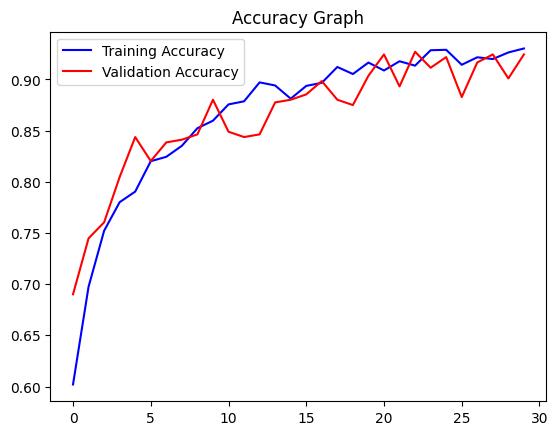

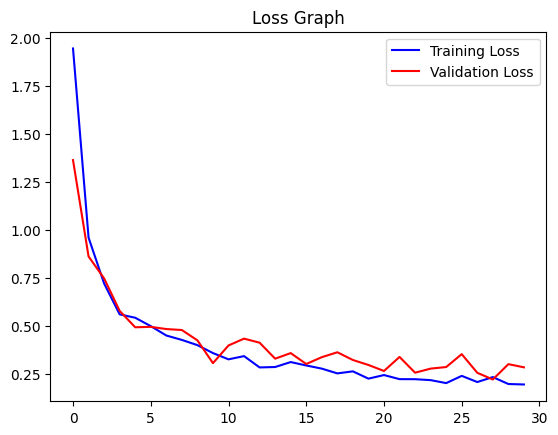

In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = H.history['loss']
val_loss = H.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

25/25 [==============================] - 10s 412ms/step


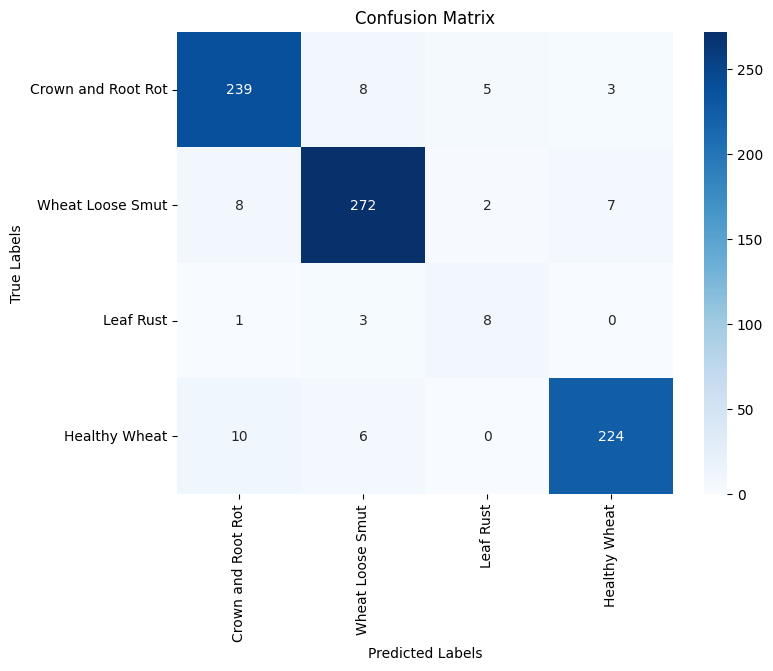

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the true labels in 'true_labels' and the predicted labels in 'predicted_labels'
true_labels = np.argmax(testY, axis=1)  # Assuming labels are one-hot encoded
predicted_labels = np.argmax(final_model.predict(testX), axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=Labels, yticklabels=Labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
